In [1]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

Using TensorFlow backend.


# 讀取資料

In [2]:
os.listdir('data/train')

['cats', 'dogs']

In [3]:
print(os.listdir('data/train/dogs')[:5])
print('Number of dogs pics: '+str(len(os.listdir('data/train/dogs'))))

['dog.10001.jpg', 'dog.10005.jpg', 'dog.1001.jpg', 'dog.10016.jpg', 'dog.10017.jpg']
Number of dogs pics: 2000


In [4]:
print(os.listdir('data/train/cats')[:5])
print('Number of cats pics: '+str(len(os.listdir('data/train/cats'))))

['cat.10001.jpg', 'cat.10002.jpg', 'cat.10005.jpg', 'cat.10008.jpg', 'cat.10024.jpg']
Number of cats pics: 2000


In [5]:
print(os.listdir('data/test')[:5])
print('Number of test pics: '+str(len(os.listdir('data/test'))))

['000.jpg', '001.jpg', '002.jpg', '003.jpg', '004.jpg']
Number of test pics: 400


In [6]:
file_path = []
category = []

for d in ['cats', 'dogs']:
    dir_path = 'data/train/' + d
    for file in os.listdir(dir_path):
        file_path.append(dir_path+ '/' + file)
        category.append(file.split('.')[0])

df_train = pd.DataFrame({'file_path': file_path, 'category': category})

df_train.sample(5)

,file_path,category
1675,data/train/cats/cat.8455.jpg,cat
3638,data/train/dogs/dog.8213.jpg,dog
3081,data/train/dogs/dog.5453.jpg,dog
3739,data/train/dogs/dog.8775.jpg,dog
403,data/train/cats/cat.2116.jpg,cat


In [7]:
df_test = pd.DataFrame({'file_path': os.listdir('data/test')})
df_test.head()

,file_path
0,000.jpg
1,001.jpg
2,002.jpg
3,003.jpg
4,004.jpg


# 檢視圖片樣式

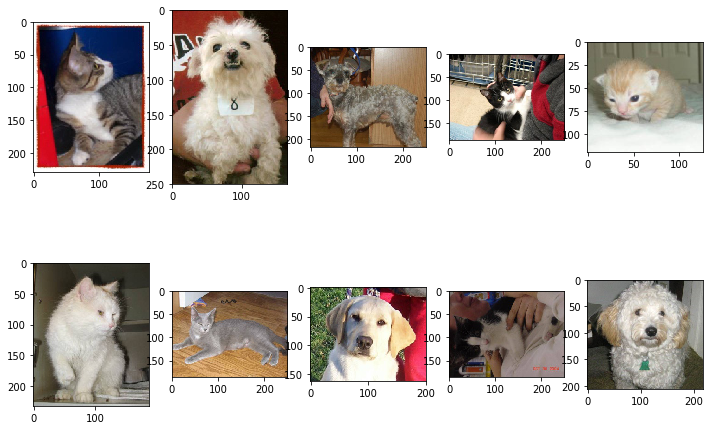

In [8]:
samples = random.choices(df_train['file_path'], k=10)

plt.figure(figsize=(12,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    image = mpimg.imread(samples[i])
    plt.imshow(image)
    
plt.show()

### 觀察
- 照片大小與格式不一，需要調整成相同的input shape
- 因為特徵例如頭的位置每張都不一樣，應該需要用padding的方式補成相同input shape
- 或用augmentation的方式讓圖片的size都一致

# 使用Augmentation

In [13]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

example_generator = data_generator.flow_from_dataframe(
        df_train, 
        x_col='file_path', 
        y_col='category',
        target_size=(150, 150),
        class_mode='categorical', 
        batch_size=1)

Found 4000 validated image filenames belonging to 2 classes.


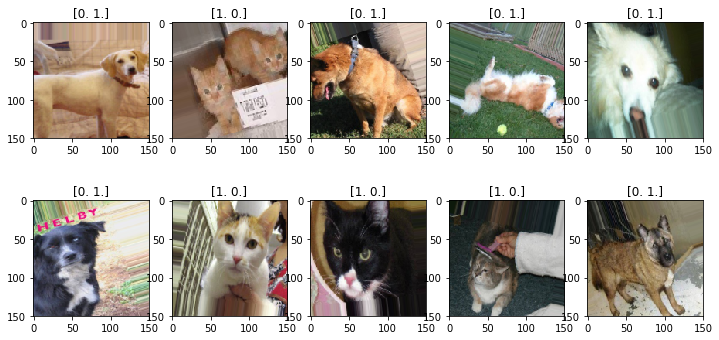

In [14]:
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    for X, Y in example_generator:
        plt.imshow((X[0].astype(int)))
        plt.title(Y[0])
        break

plt.show()